# Baseline Model Evaluation and Submission

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

import sys, os
sys.path.append('/Users/raynoldng/Projects/ieee-fraud-detection')
# sys.path.append('/home/raynoldng/Desktop/ieee-fraud-detection')
from fraud.utils import load_data
from sklearn.metrics import make_scorer
import fraud.feature_engineering as fe
from fraud.lightgbm_tuning import tune 

In [4]:
def train_model_with_params(train, test_y, params):
    d_train = lgb.Dataset(train, label=test_y)
    model = lgb.train(params, d_train, verbose_eval=False, num_boost_round=1000)
    
    return model

def create_submission(predict, name="submit.csv"):
    predict[predict > 1] = 1
    predict[predict < 0] = 0
    sample_submission = pd.read_csv('../input/sample_submission.csv')
    submission = pd.DataFrame({
        'TransactionID': sample_submission['TransactionID'],
        'isFraud': predict
    })
    submission.to_csv(name, index=False)

In [5]:
test_baseline = pd.read_pickle('../input/test_baseline.pkl')
train_baseline = pd.read_pickle('../input/train_baseline.pkl')
test_y = pd.read_pickle('../input/y_test.pkl')

In [6]:
baseline_params = {
    'bagging_fraction': 0.26787134868771023,
     'feature_fraction': 0.8250219160886082,
     'learning_rate': 0.21705123187172415,
     'max_depth': 49,
     'min_child_weight': 0.0512450758603713,
     'min_data_in_leaf': 197,
     'num_leaves': 252,
     'reg_alpha': 0.4227920102405528,
     'reg_lambda': 0.7710931279863665
}

In [7]:
baseline_model = train_model_with_params(train_baseline, test_y, baseline_params)

In [8]:
score = make_scorer(roc_auc_score)(baseline_model, train_baseline, test_y)
print("In sample score of:", score)

In sample score of: 0.9984552168303104


In [10]:
def feature_important(model, X , num = 50):
    feature_import = pd.DataFrame(sorted(zip(model.feature_importance(), X.columns)), columns = ['values', 'columns'])
    plt.figure(figsize = (12,15))
    sns.barplot(x = 'values', y = 'columns', data = feature_import.sort_values(by = 'values', ascending = False)[:num])
    plt.show()
    
def get_most_important_features(model, X, num=50):
    feature_import = pd.DataFrame(sorted(zip(model.feature_importance(), X.columns)), columns = ['values', 'columns'])
    return feature_import.sort_values(by = 'values', ascending = False)[:num]

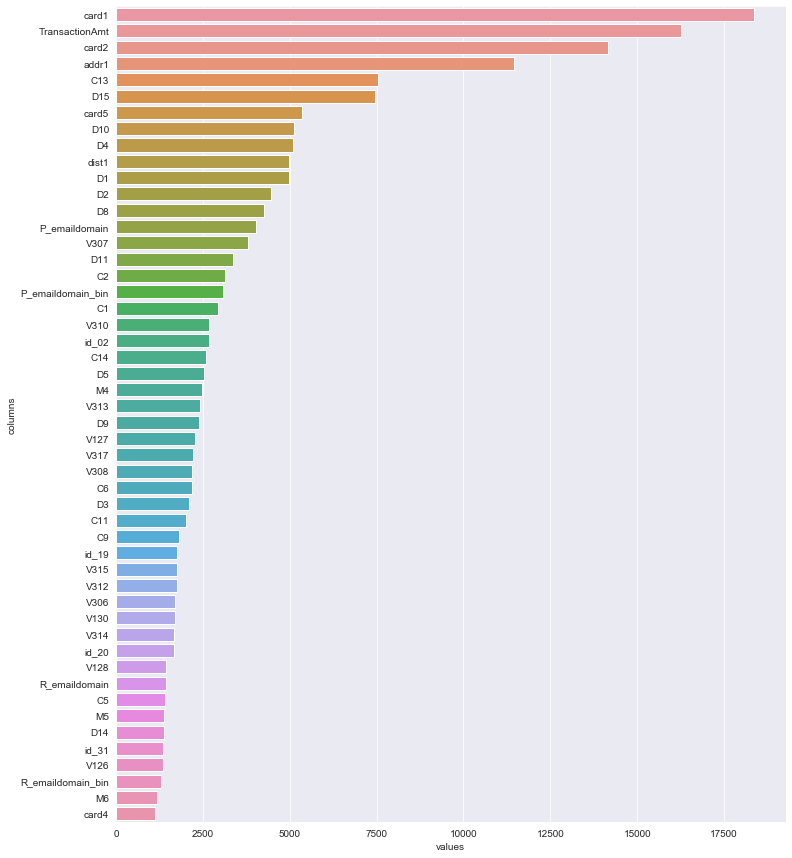

In [11]:
feature_important(baseline_model, train_baseline)

In [15]:
test_txn_dt = pd.read_pickle('../input/test_baseline_txn_dt.pkl')
train_txn_dt = pd.read_pickle('../input/train_baseline_txn_dt.pkl')

In [16]:
txn_dt_params = {
	'bagging_fraction': 0.90000000000000002, 
	'feature_fraction': 0.90000000000000002, 
	'learning_rate': 0.20000001239056728, 
	'max_depth': 50, 
	'min_child_weight': 0.070000000000000007, 
	'min_data_in_leaf': 214, 
	'num_leaves': 600, 
	'reg_alpha': 0.90000000000000002, 
	'reg_lambda': 0.90000000000000002
}

In [20]:
txn_dt_model = train_model_with_params(train_txn_dt, test_y, txn_dt_params)

In [21]:
print("In sample score of:", make_scorer(roc_auc_score)(txn_dt_model, train_txn_dt, test_y))

In sample score of: 0.99999673955


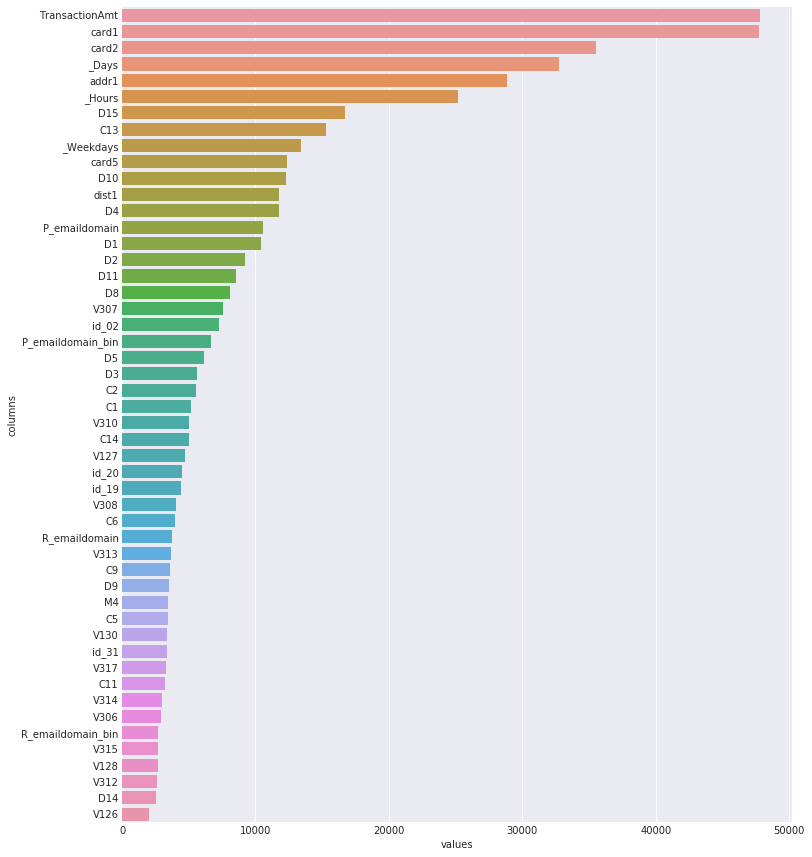

In [22]:
feature_important(txn_dt_model, train_txn_dt)

In [23]:
create_submission(txn_dt_model.predict(test_txn_dt), name="txn_dt_submit.csv")